In [2]:
import numpy as np
import matplotlib.pyplot as plt

# PRIMER PUNTO #

Resolución de la ecuación diferencial:

$\frac{dN(t)}{dt}=-\lambda N(t)$ cuya solución es $N(t)=N_{0}e^{-\lambda t}$

Por los métodos de Euler, Euler mejorado y Runge-Kutta

In [3]:
y_0=10 #mg
h=4
lamb=np.log(2)/8

Para $h=4$ entonces:

$4=\frac{40}{n}$,  entonces $n=10$

In [4]:
def Euler(f,x_0,x_n,y_0,n):
    
    h=(x_n-x_0)/n
    
    t=np.arange(x_0,x_n+h,h)
    
    y = np.zeros (len(t))

    y[0] = y_0
    t[0] = x_0

    for i in range(0, len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
    return (t,y)

def eulerMejorado(f,x_0,x_n,y_0,n):
    h=(x_n-x_0)/n
    
    t=np.arange(x_0,x_n+h,h)
    
    y = np.zeros (len(t))
    y_mej=np.zeros(len(t))

    y[0] = y_0
    y_mej[0]=y_0
    t[0] = x_0
    

    for i in range(0, len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
        y_mej[i+1]=y_mej[i]+(h/2)*(f(t[i],y_mej[i])+f(t[i+1],y[i+1]))
    return (t,y_mej)

def rk4(f,x0,xn,y0,n):
    x=np.linspace(x0,xn,n+1)
    y=np.zeros(n+1)
    h=(xn-x0)/n
    y[0]=y0
    
    for i in range(0,n):
        k1=f(x[i],y[i])
        k2=f(x[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(x[i]+0.5*h,y[i]+0.5*h*k2)
        k4=f(x[i]+h,y[i]+h*k3)
        
        y[i+1]=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
    return (x,y)

exactSol=lambda t: y_0*np.exp(-lamb*t)
t=np.arange(0,40,0.1)
f=lambda t,y: -lamb*y
    

In [5]:
Sol_1=Euler(f,0,40,10,10)
Sol_2=eulerMejorado(f,0,40,10,10)
Sol_3=rk4(f,0,40,10,10)

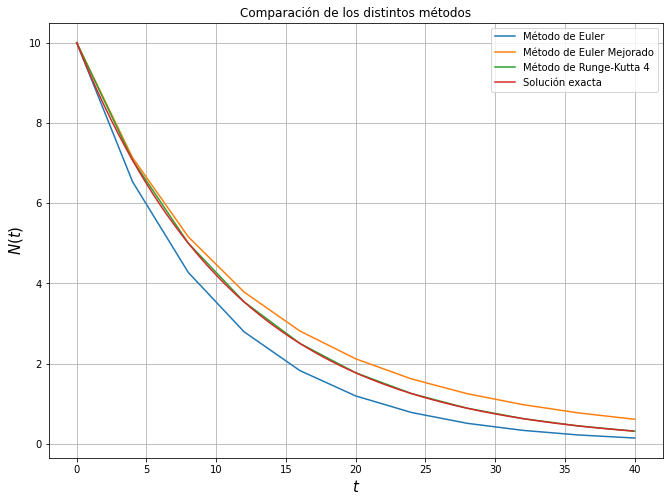

In [7]:
fig=plt.figure(figsize=(11,8))
plt.plot(Sol_1[0],Sol_1[1],label="Método de Euler")
plt.plot(Sol_2[0],Sol_2[1],label="Método de Euler Mejorado")
plt.plot(Sol_3[0],Sol_3[1],label="Método de Runge-Kutta 4")
plt.plot(t,exactSol(t),label="Solución exacta")
plt.legend()
plt.grid()
plt.title("Comparación de los distintos métodos")
plt.ylabel('$N(t)$',size=15)
plt.xlabel('$t$',size=15)
plt.show()


In [27]:
with open("./tabla.txt","w",encoding="utf-8") as file:
    file.write("Xn \t\t Euler \t\t EulerMejorado \t\t RungeKutta \t\t Exacta")
    file.write("\n")
    for i in range(0,len(Sol_1[0])):
        file.write("{} \t\t {} \t\t {} \t\t {} \t\t {}".format(round(Sol_1[0][i],6),round(Sol_1[1][i],6),round(Sol_2[1][i],6),round(Sol_3[1][i],6),round(exactSol(Sol_3[0])[i],6)))
        file.write("\n")
        

La cantidad de sustnacia para t=40 días es:

In [11]:
print(Sol_3[1][10])

0.31267405710670726


Por tanto la cantidad de sustancia después de 40 días es de:

$N(t)=0.31 mg$

# SEGUNDO PUNTO #

Solución numérica al Oscilador Duffing, dado por la ecuación diferencial:

$\frac{d^{2}x}{dt^{2}}=-2\gamma \frac{dx}{dt}-\alpha x -\beta x^{3} + Fcos(\omega t)$

Para los parámetros dados:

$\alpha=-1$, $\beta=1$, $\gamma=0.15$, $\omega=1.2$, $x(1)=0$, $x'(0)=0$

Encontrar por tanto una solución aproximada para $x(20T)$ donde $T=\frac{2\pi}{\omega}$ con $h=0.1$ y con $F(0.15,0.20,0.37,0.50,0.65)$

In [30]:
alpha=-1
beta=1
gamma=0.15
omega=1.2
t_0=0
x_0=0
x_p_0=0
T=2*np.pi/omega
h=0.1
Fuerzas=np.array((0.15,0.20,0.37,0.50,0.65))
u_0=np.array([x_0,x_p_0])
n=round(20*T/0.1)

In [53]:
def RK4(f, y, t, tfinal, n):

  d  = len(y)       
  tsol = np.zeros(n)    # array tiempo
  ysol  = np.zeros((d, n)) # array de coordenadas que contiene tanto a x, y, z      
  h = (tfinal - t)/n

  i = 0
  while i < n:
    ysol[:, i] = y 
    tsol[i] = t   

    k1 = h*f(t, y)
    k2 = h*f(t + h/2., y + k1/2.)
    k3 = h*f(t + h/2., y + k2/2.)
    k4 = h*f(t + h, y + k3)
        
    y = y + (k1 + 2.*(k2 + k3) + k4)/6.

    t = t + h   # incremente el tiempo por h
    i += 1 # incremente el contador  
        
  return tsol, ysol     # output: arrays con coords y tiempo para graficar.

In [54]:
#Definiendo un clousure para generar distintas funciones con el forzamiento
def Gen_func(F):
    def f_2(t,u):
        f1=u[1]
        f2=-2*gamma*u[1]-alpha*u[0]-beta*u[0]**3+F*np.cos(omega*t)
        return np.array([f1,f2])
    return f_2

In [55]:
Funciones=[Gen_func(Fuerzas[i]) for i in range(0,len(Fuerzas))]
Soluciones=[RK4(Funciones[i],u_0,0,20*T,n) for i in range(0,len(Funciones))]

El primer elemento de Soluciones corresponde al primer valor de fuerza y devuelve un arreglo cuya primera componente es el arreglo del tiempo y el segundo elemento es otro arreglo donde el primer elemento es $x(t)$ y el segundo elemento es $x'(t)$

In [62]:
Soluciones[0][1]

array([[0.00000000e+00, 7.42566915e-04, 2.93755721e-03, ...,
        9.08422304e-01, 9.53084976e-01, 9.98709425e-01],
       [0.00000000e+00, 1.47688708e-02, 2.90339946e-02, ...,
        4.39287248e-01, 4.52630178e-01, 4.58301111e-01]])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

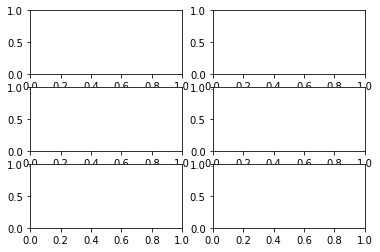

In [66]:
fig,ax=plt.subplots(3,2)
for i in range(0,len(Fuerzas)):
    ax[i].plot(Soluciones[i][0],Soluciones[i][1][0],label="F={}".format(Fuerzas[i]))
plt.legend()
plt.show()